In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy.stats import pearsonr
sns.set()

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [2]:
df = pd.read_csv('../data/data_pmhcks.tsv', sep='\t', header=0)

In [3]:
## Add Gender column
df['Gender'] = np.where(df['Male'] == 1, 'Male', 'Female')
## Bin Ages
df['AgeGroup'] = pd.cut(df['Age'], range(0,105,5), labels=range(1,21), include_lowest = True) 
df

,NoShow,LeadTime,DayOfWeek,Month,Week,Hour,Minutes,IsRecurring,IsFirstInRecurrence,Age,...,OMBBlack,OMBHawaiian,HasEmergencyContact,LastAppointmentNoShow,PreviousNoShows,TotalScheduled,NoShowRatio,LastAppointmentScripts,Gender,AgeGroup
0,0,-1,2,7,29,0,60,1,0,7,...,0,0,1,0,0,0,0.000000,0,Female,2
1,0,-1,2,7,29,0,60,1,0,3,...,0,0,1,0,0,1,0.000000,0,Male,1
2,0,0,3,7,29,0,60,1,0,28,...,0,0,0,0,0,0,0.000000,0,Male,6
3,0,13,2,7,31,0,60,1,0,39,...,0,0,1,0,0,0,0.000000,0,Female,8
4,1,7,3,7,30,0,60,1,0,5,...,0,0,0,0,0,3,0.000000,0,Male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153018,0,-1,4,4,17,0,120,1,0,11,...,0,0,1,0,6,190,0.031579,0,Female,3
1153019,0,-1,4,4,17,0,85,1,0,13,...,0,0,1,0,3,27,0.111111,0,Female,3
1153020,0,-1,4,4,17,0,120,1,0,10,...,0,0,1,0,27,1248,0.021635,0,Male,2
1153021,0,-1,4,4,17,0,120,1,0,9,...,0,0,1,0,5,323,0.015480,0,Male,2


<AxesSubplot:>

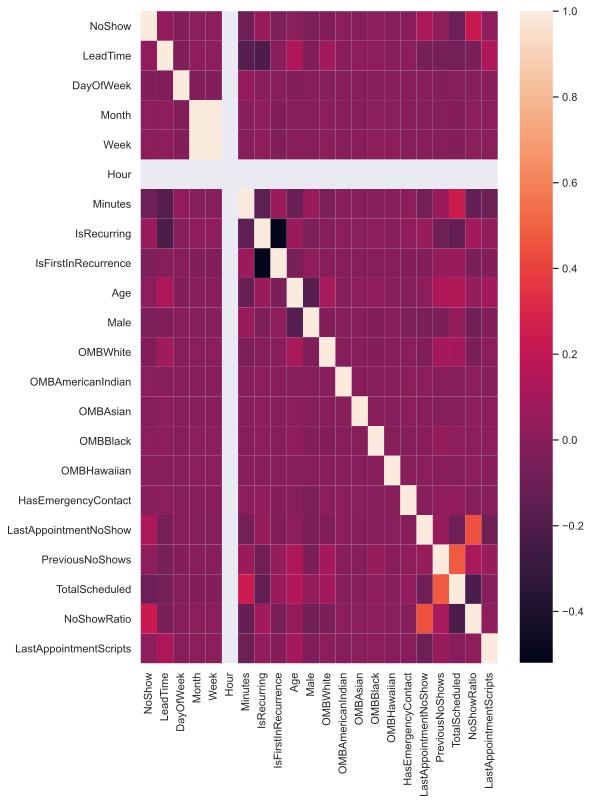

In [4]:
plt.figure(figsize=(8, 12))
sns.heatmap(df.corr())

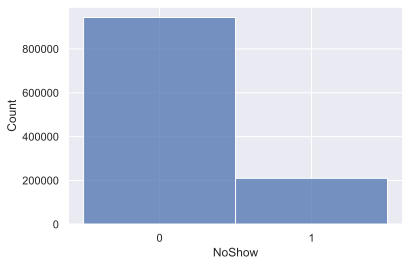

In [5]:
sns.histplot(df['NoShow'].astype(str));

Text(0.5, 1.0, 'Features Correlating with No-Show')

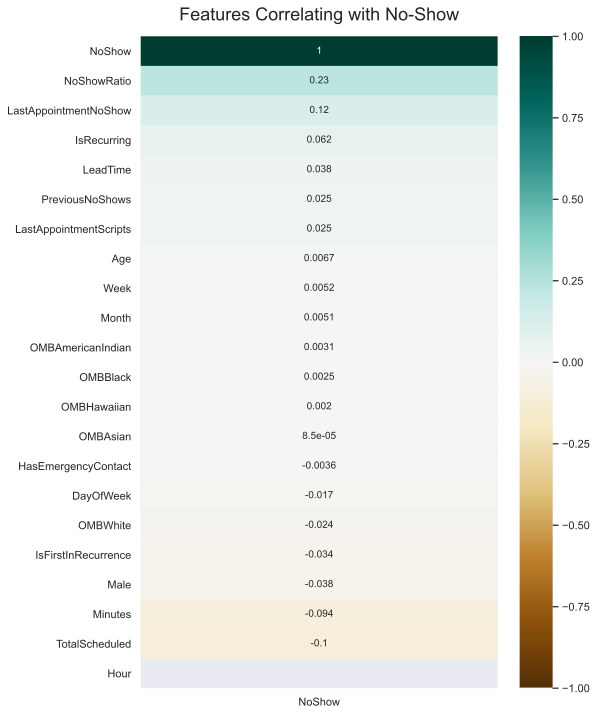

In [6]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['NoShow']].sort_values(by='NoShow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with No-Show', fontdict={'fontsize':18}, pad=16)

## NoShowRatio has the highest correlation, followed by whether their last appt was a no-show.
## Age is another indicator, but seems not as strong.
## TotalScheduled has a neg correlation, suggesting the more they've scheduled the less likely of a no-show, 
##   although the no-show ratio is probably a more direct indicator here.
## Surprisingly, LeadTime has no correlation??
## None of these correlations are strong (not above 0.5 or below -0.5)

In [7]:
## Another way to calc correlation is to use pearsonr, but the graph above does this already
corr, _ = pearsonr(df['NoShow'], df['NoShowRatio'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(df['NoShow'], df['LeadTime'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.229
Pearsons correlation: 0.038


In [8]:
noshow_by_gender = df[['NoShow', 'Gender']]

cont_noshow_gender = pd.crosstab(
    noshow_by_gender['NoShow'],
    noshow_by_gender['Gender'],
    margins = True
)
cont_noshow_gender

## Gender doesn't seem to matter significantly here

Gender,Female,Male,All
NoShow,,,
0,515048,428130,943178
1,124987,84858,209845
All,640035,512988,1153023


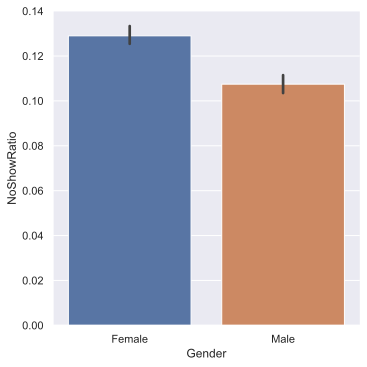

In [9]:
sns.catplot(data=df.sample(10000), x="Gender", y="NoShowRatio", kind="bar")

# Females had nearly the same no-show ratio as men

# Data Cleaning & Feature Engineering

### General Checks

In [10]:
df.describe()

,NoShow,LeadTime,DayOfWeek,Month,Week,Hour,Minutes,IsRecurring,IsFirstInRecurrence,Age,...,OMBAmericanIndian,OMBAsian,OMBBlack,OMBHawaiian,HasEmergencyContact,LastAppointmentNoShow,PreviousNoShows,TotalScheduled,NoShowRatio,LastAppointmentScripts
count,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,1153023.0,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,...,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06,1.153023e+06
mean,1.819955e-01,1.953654e+01,3.835715e+00,6.350348e+00,2.621697e+01,0.0,6.035548e+01,9.234491e-01,2.197614e-02,2.967929e+01,...,1.951392e-04,8.412668e-05,3.857685e-03,1.300928e-05,6.752276e-01,1.386373e-01,1.148910e+01,2.092112e+02,1.182789e-01,3.931283e-01
std,3.858410e-01,2.782567e+01,1.331659e+00,3.455308e+00,1.505640e+01,0.0,4.838279e+01,2.658777e-01,1.466056e-01,1.800944e+01,...,1.396787e-02,9.171678e-03,6.199038e-02,3.606816e-03,4.682899e-01,3.455678e-01,1.833276e+01,4.224559e+02,1.412596e-01,1.226212e+00
min,0.000000e+00,-2.871000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-7.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,1.300000e+01,0.0,3.000000e+01,1.000000e+00,0.000000e+00,1.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.259238e-02,0.000000e+00
50%,0.000000e+00,1.300000e+01,4.000000e+00,6.000000e+00,2.600000e+01,0.0,6.000000e+01,1.000000e+00,0.000000e+00,2.600000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,4.400000e+01,6.976744e-02,0.000000e+00
75%,0.000000e+00,2.700000e+01,5.000000e+00,9.000000e+00,3.900000e+01,0.0,6.000000e+01,1.000000e+00,0.000000e+00,4.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,1.970000e+02,1.764706e-01,0.000000e+00
max,1.000000e+00,3.736000e+03,7.000000e+00,1.200000e+01,5.300000e+01,0.0,1.440000e+03,1.000000e+00,1.000000e+00,1.190000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.690000e+02,5.444000e+03,1.000000e+00,4.600000e+01


In [11]:
df.info() ### check dtypes and for missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153023 entries, 0 to 1153022
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   NoShow                  1153023 non-null  int64   
 1   LeadTime                1153023 non-null  int64   
 2   DayOfWeek               1153023 non-null  int64   
 3   Month                   1153023 non-null  int64   
 4   Week                    1153023 non-null  int64   
 5   Hour                    1153023 non-null  int64   
 6   Minutes                 1153023 non-null  int64   
 7   IsRecurring             1153023 non-null  int64   
 8   IsFirstInRecurrence     1153023 non-null  int64   
 9   Age                     1153023 non-null  int64   
 10  Male                    1153023 non-null  int64   
 11  OMBWhite                1153023 non-null  int64   
 12  OMBAmericanIndian       1153023 non-null  int64   
 13  OMBAsian                1153023 non-null  

## Recoding 

In [12]:
df['LeadTime'].describe() ### there seems to be negative lead times...

count    1.153023e+06
mean     1.953654e+01
std      2.782567e+01
min     -2.871000e+03
25%      4.000000e+00
50%      1.300000e+01
75%      2.700000e+01
max      3.736000e+03
Name: LeadTime, dtype: float64

In [13]:
df['LeadTime'].astype(int)

0          -1
1          -1
2           0
3          13
4           7
           ..
1153018    -1
1153019    -1
1153020    -1
1153021    -1
1153022    -1
Name: LeadTime, Length: 1153023, dtype: int32

In [14]:
df[df['LeadTime'] < 0].sort_values(by='LeadTime', ascending=True) ### show rows with neg lead time

,NoShow,LeadTime,DayOfWeek,Month,Week,Hour,Minutes,IsRecurring,IsFirstInRecurrence,Age,...,OMBBlack,OMBHawaiian,HasEmergencyContact,LastAppointmentNoShow,PreviousNoShows,TotalScheduled,NoShowRatio,LastAppointmentScripts,Gender,AgeGroup
291801,0,-2871,2,12,49,0,60,1,0,2,...,0,0,1,0,0,0,0.000000,0,Female,1
1049531,0,-289,2,4,17,0,90,1,0,13,...,0,0,1,0,5,81,0.061728,0,Female,3
393944,0,-266,6,8,35,0,60,1,0,23,...,0,0,0,0,0,0,0.000000,0,Male,5
393938,0,-248,3,9,38,0,60,1,0,36,...,0,0,0,0,0,0,0.000000,0,Female,8
163221,0,-196,3,2,6,0,60,1,0,14,...,0,0,1,0,0,11,0.000000,0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782195,0,-1,4,2,7,0,120,1,0,12,...,0,0,1,0,30,442,0.067873,0,Female,3
782196,0,-1,4,2,7,0,90,1,0,6,...,0,0,1,0,6,219,0.027397,0,Male,2
782197,0,-1,4,2,7,0,90,1,0,8,...,0,0,1,0,7,691,0.010130,0,Male,2
782189,0,-1,4,2,7,0,120,1,0,8,...,0,0,1,0,8,25,0.320000,0,Female,2


In [15]:
df.loc[df['LeadTime'] < 0] = np.nan ### replace with nan so that they will be dropped later

In [16]:
# There are some extreme LeadTime outliers.  These might throw off our analysis
df[df['LeadTime'] > 0].sort_values(by='LeadTime', ascending=False) ### show rows with pos lead time

,NoShow,LeadTime,DayOfWeek,Month,Week,Hour,Minutes,IsRecurring,IsFirstInRecurrence,Age,...,OMBBlack,OMBHawaiian,HasEmergencyContact,LastAppointmentNoShow,PreviousNoShows,TotalScheduled,NoShowRatio,LastAppointmentScripts,Gender,AgeGroup
964785,0.0,3736.0,4.0,5.0,19.0,0.0,480.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,76.0,1399.0,0.054325,0.0,Male,4
849642,0.0,749.0,4.0,12.0,49.0,0.0,20.0,0.0,0.0,43.0,...,0.0,0.0,1.0,0.0,67.0,1225.0,0.054694,0.0,Male,9
849655,0.0,618.0,6.0,7.0,30.0,0.0,20.0,0.0,1.0,29.0,...,0.0,0.0,1.0,1.0,61.0,563.0,0.108348,0.0,Male,6
153570,0.0,542.0,6.0,12.0,50.0,0.0,60.0,0.0,0.0,44.0,...,0.0,0.0,1.0,0.0,18.0,520.0,0.034615,2.0,Female,9
153667,0.0,542.0,6.0,12.0,50.0,0.0,60.0,0.0,0.0,46.0,...,0.0,0.0,0.0,0.0,5.0,171.0,0.029240,0.0,Female,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710971,0.0,1.0,3.0,6.0,24.0,0.0,60.0,1.0,0.0,38.0,...,0.0,0.0,1.0,1.0,4.0,40.0,0.100000,0.0,Female,8
285907,1.0,1.0,5.0,9.0,37.0,0.0,60.0,1.0,0.0,36.0,...,0.0,0.0,1.0,1.0,51.0,166.0,0.307229,0.0,Female,8
710970,0.0,1.0,3.0,6.0,24.0,0.0,60.0,1.0,0.0,64.0,...,0.0,0.0,1.0,1.0,52.0,461.0,0.112798,0.0,Female,13
944596,0.0,1.0,6.0,11.0,48.0,0.0,90.0,1.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Male,3


In [17]:
## Remove the rows that have a LeadTime outside our inter quartile range (Q3 - Q1)
cols = ['LeadTime'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df[df['LeadTime'] > 0].sort_values(by='LeadTime', ascending=False) ### show rows with pos lead time

,NoShow,LeadTime,DayOfWeek,Month,Week,Hour,Minutes,IsRecurring,IsFirstInRecurrence,Age,...,OMBBlack,OMBHawaiian,HasEmergencyContact,LastAppointmentNoShow,PreviousNoShows,TotalScheduled,NoShowRatio,LastAppointmentScripts,Gender,AgeGroup
175844,1.0,61.0,3.0,1.0,2.0,0.0,20.0,1.0,0.0,35.0,...,0.0,0.0,1.0,1.0,21.0,44.0,0.477273,0.0,Female,7
1012288,0.0,61.0,3.0,10.0,43.0,0.0,20.0,1.0,0.0,38.0,...,0.0,0.0,0.0,1.0,30.0,202.0,0.148515,0.0,Female,8
150656,0.0,61.0,3.0,7.0,31.0,0.0,60.0,1.0,0.0,11.0,...,0.0,0.0,1.0,0.0,5.0,112.0,0.044643,0.0,Male,3
45061,1.0,61.0,2.0,8.0,32.0,0.0,15.0,1.0,0.0,6.0,...,0.0,0.0,1.0,0.0,6.0,35.0,0.171429,0.0,Male,2
983026,1.0,61.0,3.0,6.0,26.0,0.0,20.0,1.0,0.0,15.0,...,0.0,0.0,0.0,1.0,8.0,70.0,0.114286,0.0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200349,0.0,1.0,4.0,4.0,16.0,0.0,20.0,1.0,0.0,19.0,...,0.0,0.0,1.0,0.0,7.0,174.0,0.040230,0.0,Female,4
200339,0.0,1.0,4.0,4.0,16.0,0.0,90.0,1.0,0.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Male,11
1047335,0.0,1.0,4.0,1.0,5.0,0.0,60.0,1.0,0.0,33.0,...,0.0,0.0,1.0,1.0,1.0,7.0,0.142857,0.0,Male,7
371506,0.0,1.0,5.0,1.0,3.0,0.0,60.0,1.0,0.0,23.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,Male,5


In [18]:
df['DayOfWeek'].value_counts() ### weekends seem very unused

3.0    227049
4.0    226643
5.0    214943
2.0    199643
6.0    128813
7.0      3294
1.0      1229
Name: DayOfWeek, dtype: int64

## Dropping redundant columns and NAs

In [19]:
### dropping redundant featyres 
df = df.drop(['Hour', 'AgeGroup','Gender','IsRecurring','IsFirstInRecurrence','Month','Week',
              'OMBWhite','OMBAmericanIndian','OMBAsian','OMBBlack','OMBHawaiian',
              'HasEmergencyContact','LastAppointmentNoShow'], axis =1)

In [20]:
df.dropna(inplace = True) ### removing NA values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001614 entries, 2 to 1153014
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NoShow                  1001614 non-null  float64
 1   LeadTime                1001614 non-null  float64
 2   DayOfWeek               1001614 non-null  float64
 3   Minutes                 1001614 non-null  float64
 4   Age                     1001614 non-null  float64
 5   Male                    1001614 non-null  float64
 6   PreviousNoShows         1001614 non-null  float64
 7   TotalScheduled          1001614 non-null  float64
 8   NoShowRatio             1001614 non-null  float64
 9   LastAppointmentScripts  1001614 non-null  float64
dtypes: float64(10)
memory usage: 84.1 MB


In [22]:
df.columns = ['NoShow', 'LeadTime', 'DayOfWeek', 'Minutes','Age','Male','PreviousNoShows','TotalScheduled','NoShowRatio','LastAppointmentScripts']

In [23]:
df['Age'] = df['Age'].astype(int)

## Saving File 

In [24]:
import pickle 

In [25]:
df.to_pickle('df.pickle')